In [8]:
import numpy as np # linear algebra
import pandas as pd 
import os


In [9]:
data = pd.read_csv(r"C:\Users\KIIT\500_Person_Gender_Height_Weight_Index.csv")
data_visual = pd.read_csv(r"C:\Users\KIIT\500_Person_Gender_Height_Weight_Index.csv")

In [10]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [11]:
data.isnull().any()

Gender    False
Height    False
Weight    False
Index     False
dtype: bool

In [12]:
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
def convert_status_to_description(x):
    if x['Index'] == 0:
        return 'Extremely Weak'
    elif x['Index'] == 1:
        return 'Weak'
    elif x['Index'] == 2:
        return 'Normal'
    elif x['Index'] == 3:
        return 'Overweight'
    elif x['Index']== 4:
        return 'Obesity'
    elif x['Index'] == 5:
        return 'Extreme Obesity'
data_visual['Status'] = data_visual.apply(convert_status_to_description,axis=1)
data_visual.head()

,Gender,Height,Weight,Index,Status
0,Male,174,96,4,Obesity
1,Male,189,87,2,Normal
2,Female,185,110,4,Obesity
3,Female,195,104,3,Overweight
4,Male,149,61,3,Overweight


In [13]:


def convert_gender_to_label(x):
    if x['Gender'] == 'Male':
        return 1
    elif x['Gender'] == 'Female':
        return 0
data_visual['gender_lbl'] = data_visual.apply(convert_gender_to_label,axis=1)
data_visual.head()



,Gender,Height,Weight,Index,Status,gender_lbl
0,Male,174,96,4,Obesity,1
1,Male,189,87,2,Normal,1
2,Female,185,110,4,Obesity,0
3,Female,195,104,3,Overweight,0
4,Male,149,61,3,Overweight,1


In [14]:
sns.set_style('whitegrid')

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


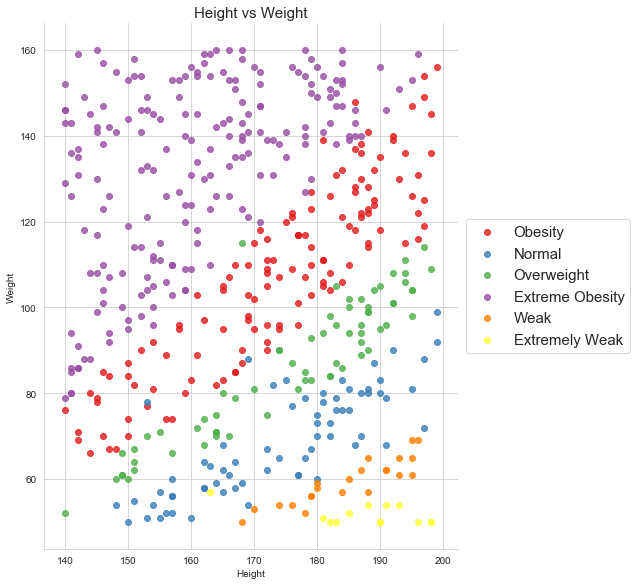

In [15]:
sns.lmplot( x='Height', y='Weight', data=data_visual, 
           fit_reg=False, 
           hue='Status', 
           legend=False, 
           palette='Set1',
           size = 8, 
           aspect = 1
          )
ax1 = plt.gca()
ax1.set_title('Height vs Weight', size=15)
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})

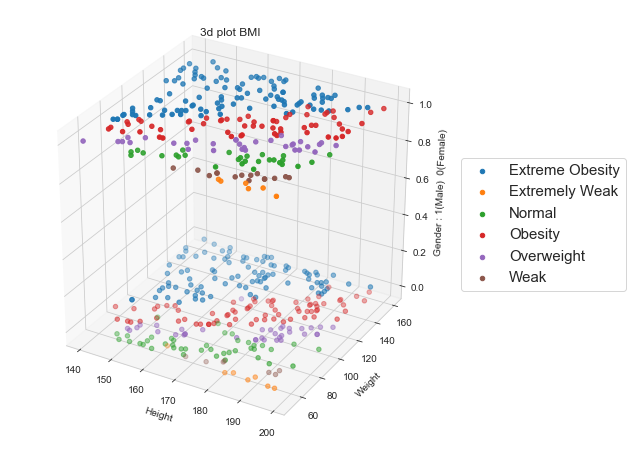

In [16]:


groups = data_visual.groupby('Status')

from mpl_toolkits.mplot3d import Axes3D
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33']
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
for name, group in groups:
    ax.scatter(group.Height, group.Weight, group.gender_lbl, label=name)
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Gender : 1(Male)  0(Female)')
ax.set_title('3d plot BMI')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 15})
plt.show()

In [17]:


people = data_visual['Gender'].value_counts() 

print(type(people))
people.head()


<class 'pandas.core.series.Series'>


Female    255
Male      245
Name: Gender, dtype: int64

In [18]:
categories = data_visual['Status'].value_counts() 
categories

Extreme Obesity    198
Obesity            130
Normal              69
Overweight          68
Weak                22
Extremely Weak      13
Name: Status, dtype: int64

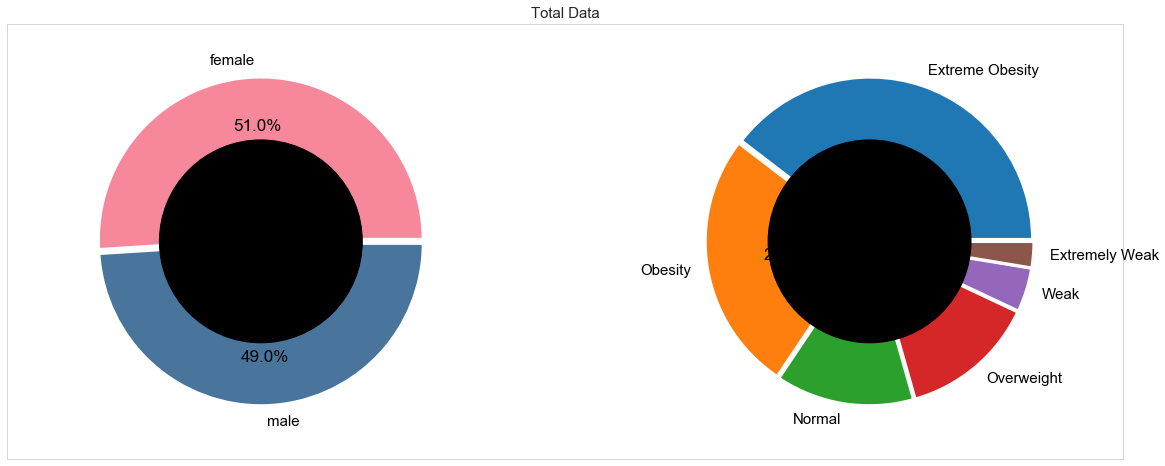

In [20]:
fig = plt.figure(figsize=(20,8))
plt.title("Total Data",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks

# first pie-plot
ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,)*(len(people))

wedges, texts, autotexts =  ax1.pie(people,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['female','male'],
                                    colors=['#f7879a','#49759c'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.7,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='black')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes

# Second pie-plot
ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01,)*(len(categories))
wedges2, texts2, autotexts2 =  ax2.pie(categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Extreme Obesity','Obesity','Normal','Overweight','Weak','Extremely Weak'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.5,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts2,size=17)
plt.setp(texts2,size=15)
my_circle = plt.Circle((0,0),0.5,color='black')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes

In [21]:
data_visual_male = data_visual[data_visual['Gender']=='Male']
data_visual_male.head()


data_visual_male_categories = data_visual_male['Status'].value_counts()
data_visual_male_categories



Extreme Obesity    105
Obesity             59
Overweight          32
Normal              28
Weak                15
Extremely Weak       6
Name: Status, dtype: int64

In [22]:
data_visual_female = data_visual[data_visual['Gender']=='Female']
data_visual_female.head()

,Gender,Height,Weight,Index,Status,gender_lbl
2,Female,185,110,4,Obesity,0
3,Female,195,104,3,Overweight,0
9,Female,169,103,4,Obesity,0
11,Female,159,80,4,Obesity,0
12,Female,192,101,3,Overweight,0


In [23]:
data_visual_female_categories = data_visual_female['Status'].value_counts()
data_visual_female_categories

Extreme Obesity    93
Obesity            71
Normal             41
Overweight         36
Weak                7
Extremely Weak      7
Name: Status, dtype: int64

Text(0, 0, 'Male')

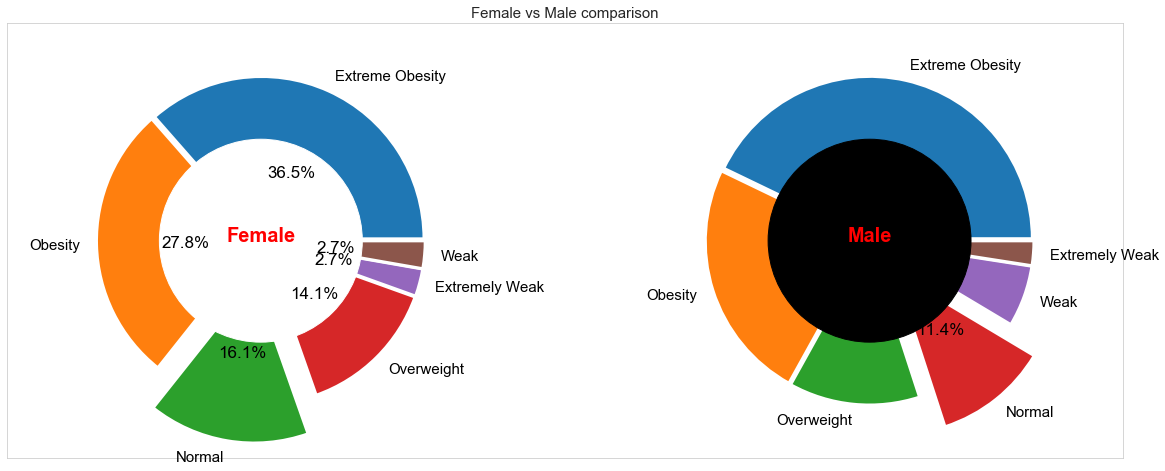

In [26]:
fig = plt.figure(figsize=(20,8))
plt.title("Female vs Male comparison",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks

# first pie-plot
ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,0.01,0.2,0.01,0.01,0.01)

wedges, texts, autotexts =  ax1.pie(data_visual_female_categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Extreme Obesity','Obesity','Normal','Overweight','Extremely Weak','Weak'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.45,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes
ax1.text(0,0,'Female',size=20,color='#FF0000',horizontalalignment='center',weight='bold')

# Second pie-plot
ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01,0.01,0.01,0.2,0.01,0.01)
wedges2, texts2, autotexts2 =  ax2.pie(data_visual_male_categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Extreme Obesity','Obesity','Overweight','Normal','Weak','Extremely Weak'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.45,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts2,size=17)
plt.setp(texts2,size=15)
my_circle = plt.Circle((0,0),0.5,color='black')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes
ax2.text(0,0,'Male',size=20,color='#FF0000',horizontalalignment='center',weight='bold')

In [28]:


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lbl_enc = LabelEncoder()
data.iloc[:,0] = lbl_enc.fit_transform(data.iloc[:,0])
one_hot_enc_for_gender = OneHotEncoder()
data = one_hot_enc_for_gender.fit_transform(data).toarray()


df = pd.DataFrame(data)
df.head()



,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [33]:




from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()
df.iloc[:,0:-1] = std_sc.fit_transform(df.iloc[:,0:-1])
df.head()


,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,-1.020204,1.020204,-0.127515,-0.127515,-0.135388,-0.077693,-0.100504,-0.135388,-0.135388,-0.119159,...,-0.077693,-0.077693,-0.089803,-0.110208,-0.163383,-0.214535,-0.400116,-0.396746,1.687055,0.0
1,-1.020204,1.020204,-0.127515,-0.127515,-0.135388,-0.077693,-0.100504,-0.135388,-0.135388,-0.119159,...,-0.077693,-0.077693,-0.089803,-0.110208,-0.163383,-0.214535,2.499275,-0.396746,-0.592749,0.0
2,0.980196,-0.980196,-0.127515,-0.127515,-0.135388,-0.077693,-0.100504,-0.135388,-0.135388,-0.119159,...,-0.077693,-0.077693,-0.089803,-0.110208,-0.163383,-0.214535,-0.400116,-0.396746,1.687055,0.0
3,0.980196,-0.980196,-0.127515,-0.127515,-0.135388,-0.077693,-0.100504,-0.135388,-0.135388,-0.119159,...,-0.077693,-0.077693,-0.089803,-0.110208,-0.163383,-0.214535,-0.400116,2.520504,-0.592749,0.0
4,-1.020204,1.020204,-0.127515,-0.127515,-0.135388,-0.077693,-0.100504,-0.135388,-0.135388,-0.119159,...,-0.077693,-0.077693,-0.089803,-0.110208,-0.163383,-0.214535,-0.400116,2.520504,-0.592749,0.0


In [34]:


X = df.iloc[:,:-1]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)


print(type(X_train))
X_train.head()



<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9,...,167,168,169,170,171,172,173,174,175,176
107,-1.020204,1.020204,-0.127515,-0.127515,-0.135388,-0.077693,-0.100504,-0.135388,-0.135388,-0.119159,...,-0.110208,-0.077693,-0.077693,-0.089803,-0.110208,-0.163383,-0.214535,-0.400116,-0.396746,-0.592749
336,0.980196,-0.980196,-0.127515,-0.127515,-0.135388,-0.077693,-0.100504,-0.135388,-0.135388,-0.119159,...,-0.110208,-0.077693,-0.077693,-0.089803,-0.110208,-0.163383,-0.214535,-0.400116,-0.396746,-0.592749
71,-1.020204,1.020204,-0.127515,-0.127515,-0.135388,-0.077693,-0.100504,-0.135388,-0.135388,-0.119159,...,-0.110208,-0.077693,-0.077693,-0.089803,-0.110208,-0.163383,-0.214535,-0.400116,-0.396746,1.687055
474,0.980196,-0.980196,-0.127515,-0.127515,-0.135388,-0.077693,-0.100504,-0.135388,-0.135388,-0.119159,...,-0.110208,-0.077693,-0.077693,-0.089803,-0.110208,-0.163383,-0.214535,-0.400116,2.520504,-0.592749
6,-1.020204,1.020204,-0.127515,-0.127515,-0.135388,-0.077693,-0.100504,-0.135388,-0.135388,8.392173,...,-0.110208,-0.077693,-0.077693,-0.089803,-0.110208,-0.163383,-0.214535,-0.400116,-0.396746,-0.592749


In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=0)
rfc.fit(X_train, y_train)


y_pred_rfc = rfc.predict(X_test)



In [36]:
from sklearn.metrics import confusion_matrix
rfc_cm = confusion_matrix(y_test, y_pred_rfc)
rfc_cm

array([[64,  0],
       [ 0, 36]], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score
rfc_acc = accuracy_score(y_test, y_pred_rfc)
rfc_acc*100

100.0

In [38]:
def trees_in_forest_vs_acc(trees, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    rfc = RandomForestClassifier(n_estimators=trees, criterion='entropy', random_state=0)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

,No. of trees in Forest,Accuracy scores for Random Forest Classification
0,100,1.0
1,200,1.0
2,300,1.0
3,500,1.0
4,700,1.0


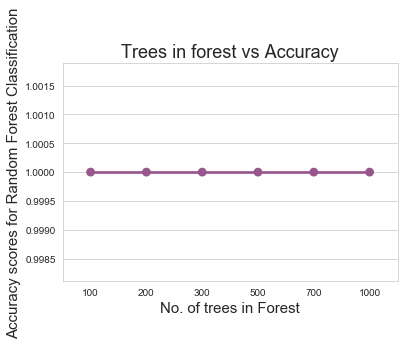

In [52]:
trees_list_for_randomForest = [100, 200, 300, 500, 700, 1000]
acc_scores_for_trees_RFC = []
for x in trees_list_for_randomForest:
    acc_scores_for_trees_RFC.append(trees_in_forest_vs_acc(x))
acc_scores_for_trees_RFC
tree_vs_acc = pd.DataFrame({'No. of trees in Forest':trees_list_for_randomForest,
              'Accuracy scores for Random Forest Classification':acc_scores_for_trees_RFC})


sns.pointplot(x='No. of trees in Forest',y='Accuracy scores for Random Forest Classification',data=tree_vs_acc,color='#98568d')

plt.title('Trees in forest vs Accuracy',size=18)
plt.xlabel('No. of trees in Forest',size=15)
plt.ylabel('Accuracy scores for Random Forest Classification',size=15)


tree_vs_acc.head()
